In [52]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import squarify
from matplotlib import colormaps

In [2]:
# Columnas y filas
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [3]:
# Importar DF
df = pd.read_csv('Berlin_Final.csv', index_col= 0)
df

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,bathrooms_text,amenities,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",within a few hours,f,prenzlauer berg,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,730.0,0,4,4,250,5.0,126,13230.0,4.63000,4.520000,4.920000,4.610000,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",within a day,f,prenzlauer berg,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,94.748079,93.375094,1.0,1.0,7.0,1.0,1.0,1.0,135.000000,6.0,14.0,6.0,14.0,0,0,5,193,7.0,0,0.0,5.00000,5.000000,4.860000,4.860000,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",within a day,t,prenzlauer berg,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...","['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,100.000000,93.375094,4.0,5.0,1.0,1.0,1.0,1.0,75.000000,150.0,1125.0,150.0,1125.0,0,0,0,262,26.0,0,0.0,4.68000,4.850000,4.600000,4.450000,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",within a few hours,f,kreuzberg,1 bath,"[""Iron"", ""Hangers"", ""Wifi"", ""Hair dryer"", ""Pac...",['phone'],t,t,"Berlin, Germany",nördliche luisenstadt,Friedrichshain-Kreuzberg,52.503120,13.435080,Entire condo,Entire home/apt,100.000000,93.375094,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,365.0,93.0,365.0,0,0,0,0,48.0,0,0.0,4.72000,4.860000,4.670000,4.710000,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,f,copacabana,1 bath,"[""Iron"", ""Wifi"", ""Free street parking"", ""Hot w...","['email', 'phone']",t,t,"Berlin, Germany",reuterstraße,Neukölln,52.494190,13.421660,Entire rental unit,Entire home/apt,100.000000,94.000000,2.0,5.0,2.0,1.0,1.0,1.0,28.000000,92.0,365.0,92.0,365.0,0,0,17,111,5.0,0,0.0,4.77000,4.710000,4.880000,4.650000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",within an hour,f,gropiuss

In [4]:
# Revisar DF y crear copia a trabajar
df_extrac = df.copy()
df_extrac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14187 entries, 0 to 14186
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            14187 non-null  int64  
 1   listing_url                   14187 non-null  object 
 2   last_scraped                  14187 non-null  object 
 3   source                        14187 non-null  object 
 4   name                          14187 non-null  object 
 5   host_id                       14187 non-null  int64  
 6   host_url                      14187 non-null  object 
 7   host_name                     14187 non-null  object 
 8   host_since                    14174 non-null  object 
 9   host_location                 14187 non-null  object 
 10  host_response_time            14187 non-null  object 
 11  host_is_superhost             14187 non-null  object 
 12  host_neighbourhood            14187 non-null  object 
 13  bathro

**Extraer características estadísticas de un análisis univariado a variables categóricas**

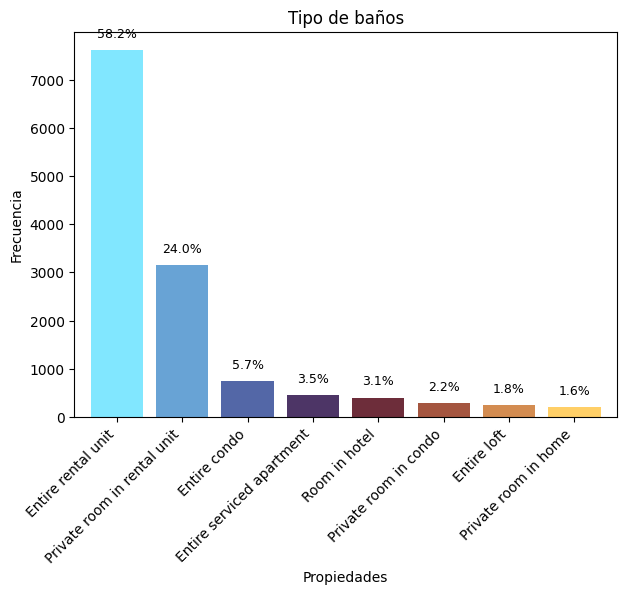

In [ ]:
# 1. Análisis univariado property_type
Tabla_freq_prop = df_extrac['property_type'].value_counts().reset_index()
Tabla_freq_prop 

# Filtro de valores más relevantes de la variable categórica
Filtro_prop = Tabla_freq_prop[Tabla_freq_prop['count'] > 65].head(8)
Filtro_prop

# Ajustar el índice del DF
Filtro_index_prop = Filtro_prop.set_index('property_type')
Filtro_index_prop

# Calcular porcentajes
Filtro_index_prop['Porcentaje'] = (Filtro_index_prop['count'] / Filtro_index_prop['count'].sum()) * 100

# Escala de colores (usamos viridis, pero puedes cambiarlo a plasma, inferno, coolwarm, etc.)
colors = cm.managua_r(np.linspace(0, 1, len(Filtro_index_prop)))

# Graficar
graph_property_type = Filtro_index_prop['count'].plot(kind='bar', width=0.8, figsize=(7,5), color=colors)

plt.title('Tipo de baños')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Propiedades')
plt.ylabel('Frecuencia')

# Añadir etiquetas de porcentaje en cada barra
for i, (value, pct) in enumerate(zip(Filtro_index_prop['count'], Filtro_index_prop['Porcentaje'])):
    graph_property_type.text(i, value + 200, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()



Text(0, 0.5, '')

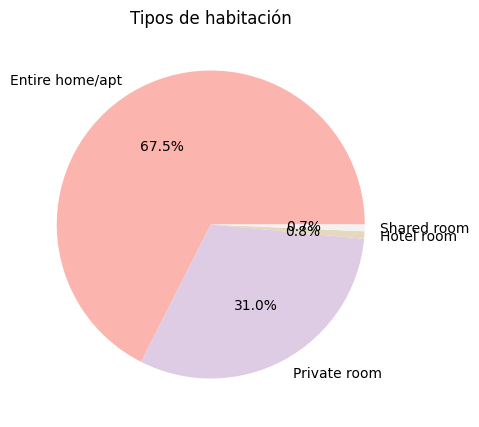

In [44]:
# 2. Análisis univariado room_type
Tabla_freq_room = df_extrac['room_type'].value_counts().reset_index()
Tabla_freq_room

# Filtro de valores más relevantes de la variable categórica
Filtro_room = Tabla_freq_room[Tabla_freq_room['count'] > 1]
Filtro_room

# Ajustar el índice del DF
Filtro_index_room = Filtro_room.set_index('room_type')
Filtro_index_room

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
# Gráfico de pastel del DF
Filtro_index_room['count'].plot(kind= 'pie', figsize= (10,5), shadow = False, autopct = "%0.1f%%", colormap = 'Pastel1')
plt.title('Tipos de habitación')
plt.xlabel('')
plt.ylabel('')


Text(0, 0.5, 'Frecuencia')

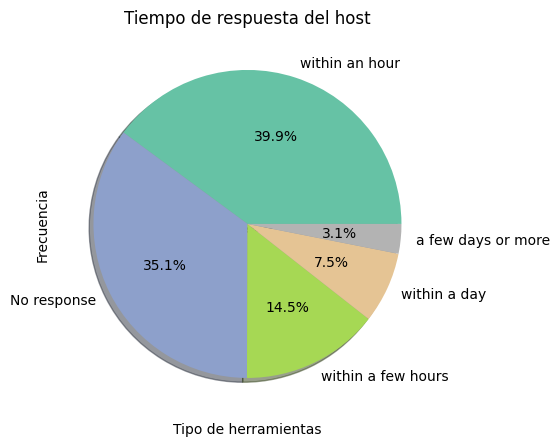

In [7]:
# 3. Análisis univariado host_response_time
Tabla_freq_time = df_extrac['host_response_time'].value_counts().reset_index()
Tabla_freq_time

# Filtro de valores más relevantes de la variable categórica
Filtro_time = Tabla_freq_time[Tabla_freq_time['count'] > 1]
Filtro_time

# Ajustar el índice del DF
Filtro_index_time = Filtro_time.set_index('host_response_time')
Filtro_index_time

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_time['count'].plot(kind= 'pie', figsize= (10,5), shadow = True, autopct = "%0.1f%%", colormap = 'Set2')
plt.title('Tiempo de respuesta del host')
plt.xlabel('Tipo de herramientas')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Frecuencia')

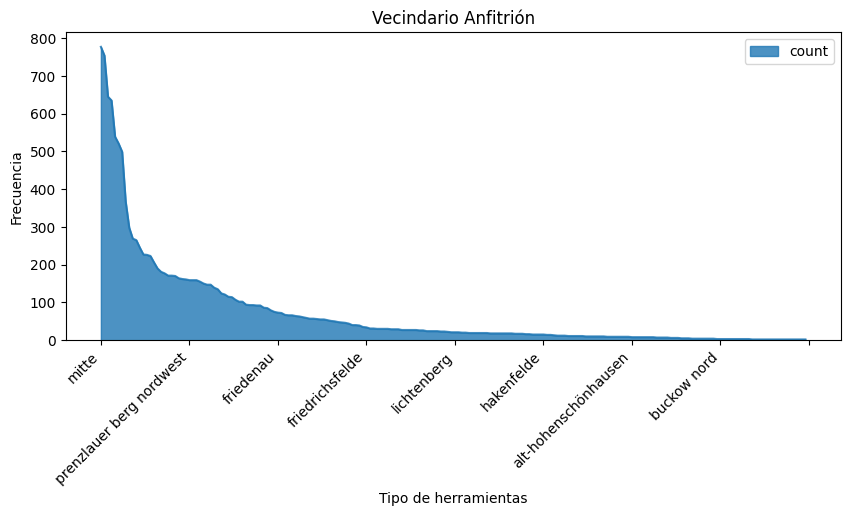

In [8]:
# 4. Análisis univariado host_neighbourhood 
Tabla_freq_neigh = df_extrac['host_neighbourhood'].value_counts().reset_index()
Tabla_freq_neigh

# Filtro de valores más relevantes de la variable categórica
Filtro_neigh = Tabla_freq_neigh[Tabla_freq_neigh['count'] > 1]
Filtro_neigh

# Ajustar el índice del DF
Filtro_index_neigh= Filtro_neigh.set_index('host_neighbourhood')
Filtro_index_neigh

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_neigh.plot(kind= 'area', figsize= (10,4), alpha = 0.8, colormap= 'tab10')
plt.title('Vecindario Anfitrión')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de herramientas')
plt.ylabel('Frecuencia')



Text(0, 0.5, 'Frecuencia')

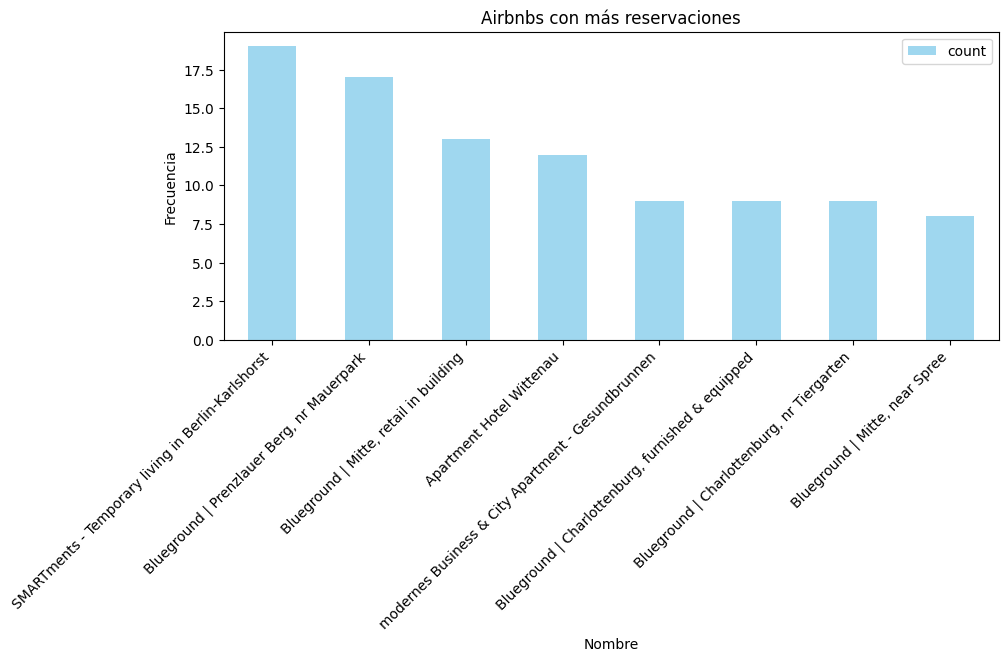

In [9]:
# 5. Análisis univariado 'name'
Tabla_freq_name = df_extrac['name'].value_counts().reset_index()
Tabla_freq_name

# Filtro de valores más relevantes de la variable categórica
Filtro_name = Tabla_freq_name[Tabla_freq_name['count'] > 6].head(8)
Filtro_name

# Ajustar el índice del DF
Filtro_index_name= Filtro_name.set_index('name')
Filtro_index_name

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_name.plot(kind= 'bar', figsize= (10,4), alpha = 0.8, color = 'skyblue')
plt.title('Airbnbs con más reservaciones')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Amenidades')

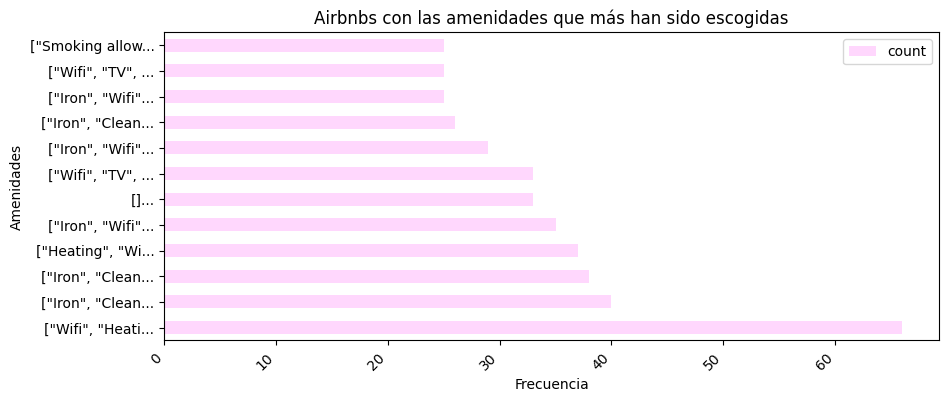

In [10]:
# 6. Análisis univariado 'amenities'
Tabla_freq_amenities = df_extrac['amenities'].value_counts().reset_index()
Tabla_freq_amenities

# Filtro de valores más relevantes de la variable categórica
Filtro_amenities = Tabla_freq_amenities[Tabla_freq_amenities['count'] > 23]
Filtro_amenities.head(11)

# Ajustar el índice del DF
Filtro_index_amenities= Filtro_amenities.set_index('amenities')
Filtro_index_amenities

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_amenities.index = Filtro_index_amenities.index.str.slice(0, 15) + "..."
Filtro_index_amenities.plot(kind= 'barh', figsize= (10,4), alpha = 0.8, colormap = 'vanimo')
plt.title('Airbnbs con las amenidades que más han sido escogidas')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Frecuencia')
plt.ylabel('Amenidades')




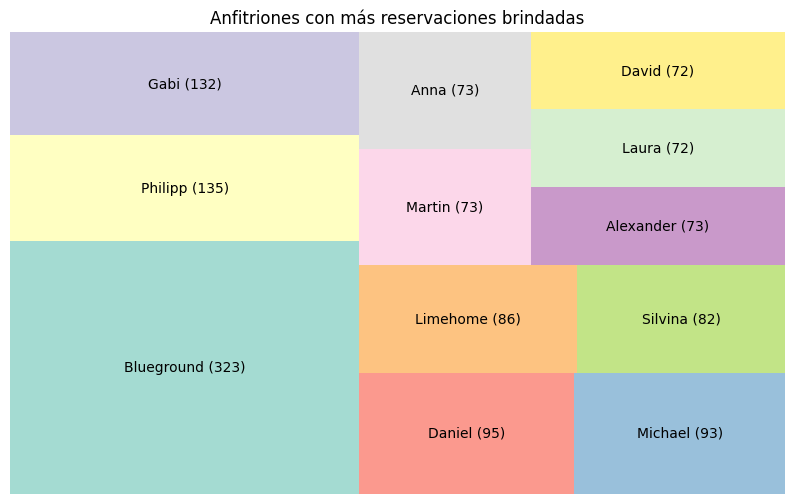

In [71]:
# 7. Análisis univariado 'host_name'
Tabla_freq_host_name = df_extrac['host_name'].value_counts().reset_index()
Tabla_freq_host_name

# Filtro de valores más relevantes de la variable categórica
Filtro_host_names = Tabla_freq_host_name[Tabla_freq_host_name['count'] >= 72]
Filtro_host_names

# Ajustar el índice del DF
Filtro_index_host_names = Filtro_host_names.set_index('host_name')
Filtro_index_host_names

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
sizes = Filtro_index_host_names['count']
labels = Filtro_index_host_names.index + " (" + Filtro_index_host_names['count'].astype(str) + ")"

# Gráfica
plt.figure(figsize=(10,6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.Set3.colors)
plt.title("Anfitriones con más reservaciones brindadas")
plt.axis("off")
plt.show()




Text(0, 0.5, 'Frecuencia')

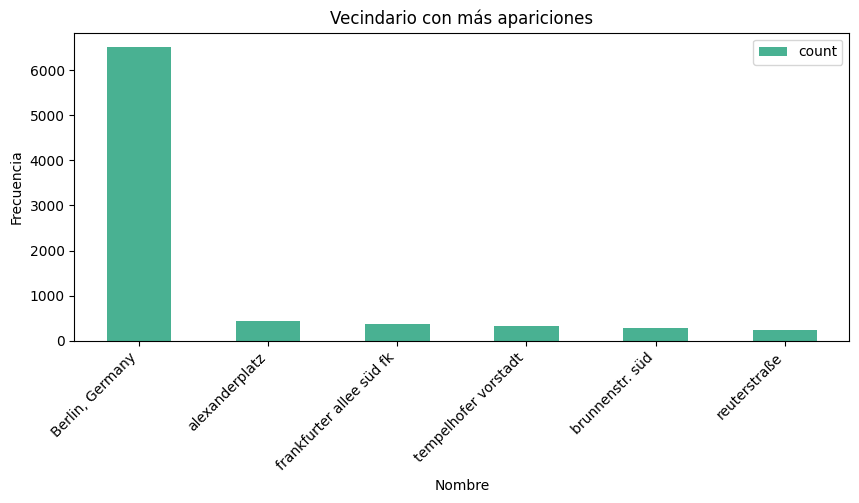

In [41]:
# 8. Análisis univariado 'neighbourhood'
Tabla_freq_neighbourhood = df_extrac['neighbourhood'].value_counts().reset_index()
Tabla_freq_neighbourhood

# Filtro de valores más relevantes de la variable categórica
Filtro_host_neighbourhood = Tabla_freq_neighbourhood[Tabla_freq_neighbourhood['count'] > 164].head(6)
Filtro_host_neighbourhood

# Ajustar el índice del DF
Filtro_index_neighbourhood = Filtro_host_neighbourhood.set_index('neighbourhood')
Filtro_index_neighbourhood

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_neighbourhood.plot(kind= 'bar', figsize= (10,4), alpha = 0.8, colormap = 'Dark2')
plt.title('Vecindario con más apariciones')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

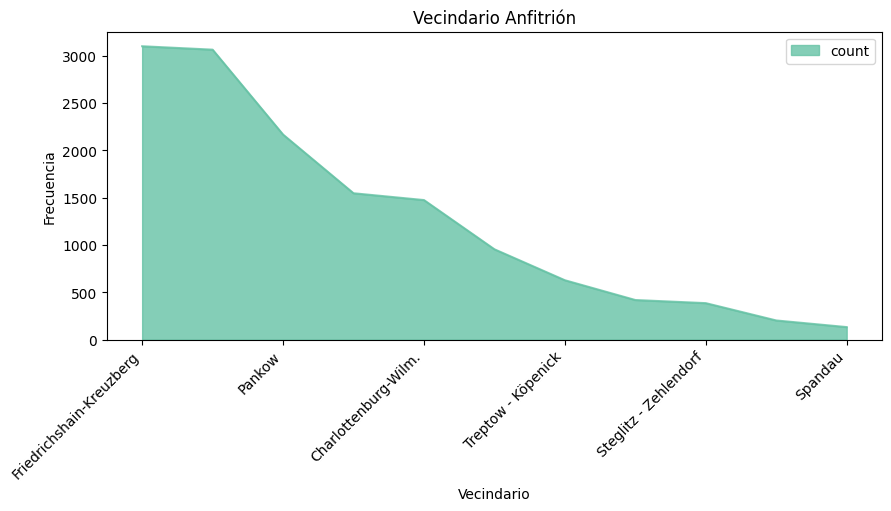

In [13]:
# 9. Análisis univariado 'neighbourhood_group_cleansed'
Tabla_freq_cleansed = df_extrac['neighbourhood_group_cleansed'].value_counts().reset_index()
Tabla_freq_cleansed

# Filtro de valores más relevantes de la variable categórica
Filtro_cleansed = Tabla_freq_cleansed[Tabla_freq_cleansed['count'] > 121]
Filtro_cleansed

# Ajustar el índice del DF
Filtro_index_cleansed = Filtro_cleansed.set_index('neighbourhood_group_cleansed')
Filtro_index_cleansed

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_cleansed.plot(kind= 'area', figsize= (10,4), alpha = 0.8, colormap= 'Set2')
plt.title('Vecindario Anfitrión')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vecindario')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

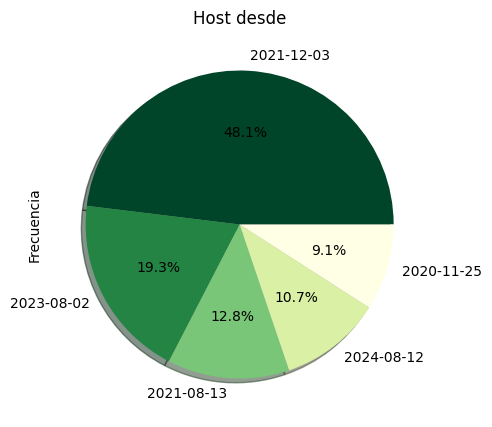

In [ ]:
# 10. Análisis univariado host_since
Tabla_freq_since = df_extrac['host_since'].value_counts().reset_index()
Tabla_freq_since

# Filtro de valores más relevantes de la variable categórica
Filtro_time_since = Tabla_freq_since[Tabla_freq_since['count'] > 1].head(5)
Filtro_time_since

# Ajustar el índice del DF
Filtro_index_since = Filtro_time_since.set_index('host_since')
Filtro_index_since

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_since['count'].plot(kind= 'pie', figsize= (10,5), shadow = True, autopct = "%0.1f%%", colormap = 'YlGn_r')
plt.title('Host desde')
plt.ylabel('Frecuencia') 

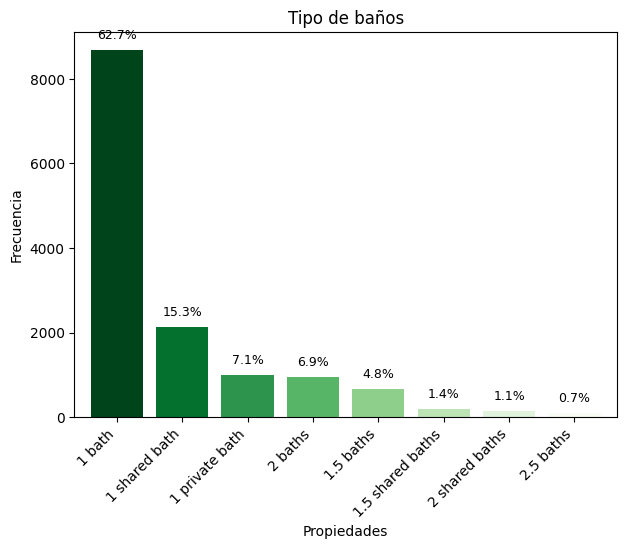

In [63]:
#Análisis univariado Bathrooms_text
Tabla_freq_bath_t = df_extrac['bathrooms_text'].value_counts().reset_index()
Tabla_freq_bath_t

# Filtro de valores más relevantes de la variable categórica
Filtro_bath_t = Tabla_freq_bath_t[Tabla_freq_bath_t['count'] > 1].head(8)
Filtro_bath_t

# Ajustar el índice del DF
Filtro_index_bath_t = Filtro_bath_t.set_index('bathrooms_text')
Filtro_index_bath_t

## Gráfica
# Calcular porcentajes
Filtro_index_bath_t['Porcentaje'] = (Filtro_index_bath_t['count'] / Filtro_index_bath_t['count'].sum()) * 100

# Escala de colores (usamos viridis, pero puedes cambiarlo a plasma, inferno, coolwarm, etc.)
colors = cm.Greens_r(np.linspace(0, 1, len(Filtro_index_bath_t)))

# Graficar
graph_bath_t = Filtro_index_bath_t['count'].plot(kind='bar', width=0.8, figsize=(7,5), color=colors)

plt.title('Tipo de baños')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Propiedades')
plt.ylabel('Frecuencia')

# Añadir etiquetas de porcentaje en cada barra
for i, (value, pct) in enumerate(zip(Filtro_index_bath_t['count'], Filtro_index_bath_t['Porcentaje'])):
    graph_bath_t.text(i, value + 200, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()

In [15]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

**Categorizar variables cuantitativas**

In [16]:
#DF
df_extrac

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,bathrooms_text,amenities,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",within a few hours,f,prenzlauer berg,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,730.0,0,4,4,250,5.0,126,13230.0,4.63000,4.520000,4.920000,4.610000,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",within a day,f,prenzlauer berg,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...","['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,94.748079,93.375094,1.0,1.0,7.0,1.0,1.0,1.0,135.000000,6.0,14.0,6.0,14.0,0,0,5,193,7.0,0,0.0,5.00000,5.000000,4.860000,4.860000,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",within a day,t,prenzlauer berg,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...","['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,100.000000,93.375094,4.0,5.0,1.0,1.0,1.0,1.0,75.000000,150.0,1125.0,150.0,1125.0,0,0,0,262,26.0,0,0.0,4.68000,4.850000,4.600000,4.450000,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",within a few hours,f,kreuzberg,1 bath,"[""Iron"", ""Hangers"", ""Wifi"", ""Hair dryer"", ""Pac...",['phone'],t,t,"Berlin, Germany",nördliche luisenstadt,Friedrichshain-Kreuzberg,52.503120,13.435080,Entire condo,Entire home/apt,100.000000,93.375094,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,365.0,93.0,365.0,0,0,0,0,48.0,0,0.0,4.72000,4.860000,4.670000,4.710000,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",within an hour,f,copacabana,1 bath,"[""Iron"", ""Wifi"", ""Free street parking"", ""Hot w...","['email', 'phone']",t,t,"Berlin, Germany",reuterstraße,Neukölln,52.494190,13.421660,Entire rental unit,Entire home/apt,100.000000,94.000000,2.0,5.0,2.0,1.0,1.0,1.0,28.000000,92.0,365.0,92.0,365.0,0,0,17,111,5.0,0,0.0,4.77000,4.710000,4.880000,4.650000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",within an hour,f,gropiuss

In [17]:
#host_response_rate
# Calculamos el número total de la población "n"
df_extrac['host_response_rate'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_resp = df_extrac['host_response_rate'].max()
Min_resp = df_extrac['host_response_rate'].min()
Limites = [Min_resp, Max_resp]
print(Limites)

# Rango R
R_resp = Max_resp - Min_resp
print("Rango:", R_resp)

# Calculamos el número de intervalos de la clase "ni" con regla de Sturges
import numpy as np
ni_resp = 1 + 3.32*np.log10(n)
print("Número de intervalos (Sturges):", ni_resp) #

# Calculamos el ancho del intervalo "i"
i_resp = R_resp / ni_resp
print("Ancho del intervalo:", i_resp)

# Definimos edges → 16 edges para 15 intervalos
intervalos_resp = np.linspace(72.99, 100.01, 16)
print(intervalos_resp)

# Creamos categorías, con toque DE/EN
categorias_resp = [
    "Sehr gering | Very low (73.00 - 74.83%)",
    "Eingeschränkt | Limited (74.83 - 76.66%)",
    "Niedrig | Low (76.66 - 78.49%)",
    "Langsam | Slow (78.49 - 80.32%)",
    "Mäßig-niedrig | Mod.-low (80.32 - 82.15%)",
    "Mittel | Moderate (82.15 - 83.98%)",
    "Solide | Solid (83.98 - 85.81%)",
    "Akzeptabel | Acceptable (85.81 - 87.64%)",
    "Zufriedenst. | Satisfactory (87.64 - 89.47%)",
    "Hoch | High (89.47 - 91.30%)",
    "Zuverlässig | Reliable (91.30 - 93.13%)",
    "Sehr hoch | Very high (93.13 - 94.96%)",
    "Vertrauensw. | Trustworthy (94.96 - 96.79%)",
    "Exzellent | Excellent (96.79 - 98.62%)",
    "Spitzenklasse | Premium (98.62 - 100.0%)"
]

# Creando las categorías en una NUEVA columna
df_extrac['host_response_rate_cat'] = pd.cut(x=df_extrac['host_response_rate'], bins=intervalos_resp, labels=categorias_resp,
    include_lowest=True, right=False
)

df_extrac[['host_response_rate', 'host_response_rate_cat']].head(20)



<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(73.0), np.float64(100.0)]
Rango: 27.0
Número de intervalos (Sturges): 14.784276688200496
Ancho del intervalo: 1.8262645220614016
[ 72.99        74.79133333  76.59266667  78.394       80.19533333
  81.99666667  83.798       85.59933333  87.40066667  89.202
  91.00333333  92.80466667  94.606       96.40733333  98.20866667
 100.01      ]


,host_response_rate,host_response_rate_cat
0,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
1,94.748079,Vertrauensw. | Trustworthy (94.96 - 96.79%)
2,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
3,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
4,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
5,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
6,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
7,100.000000,Spitzenklasse | Premium (98.62 - 100.0%)
8,88.880000,Zufriedenst. | Satisfactory (87.64 - 89.47%)
9,88.880000,Zufriedenst. | Satisfactory (87.64 - 89.47%)


Text(0, 0.5, '')

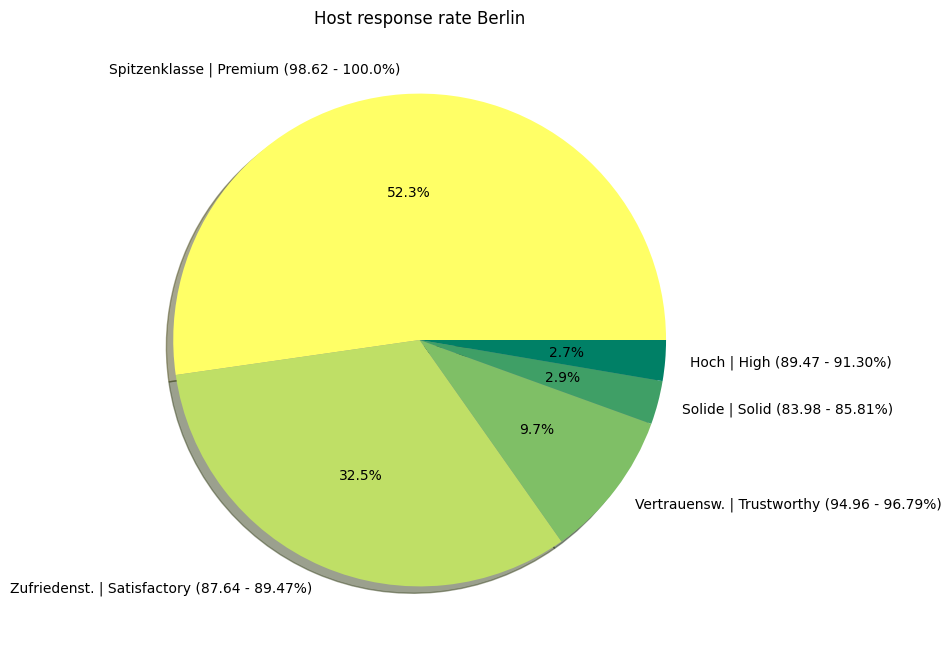

In [18]:
# Análisis univariado host_response_rate
Tabla_freq_host_response_rate = df_extrac['host_response_rate_cat'].value_counts().reset_index()
Tabla_freq_host_response_rate

# Filtro de valores más relevantes de la variable categórica
Filtro_time_host_r = Tabla_freq_host_response_rate[Tabla_freq_host_response_rate['count'] > 1].head(5)
Filtro_time_host_r

# Ajustar el índice del DF
Filtro_index_host_r = Filtro_time_host_r.set_index('host_response_rate_cat')
Filtro_index_host_r

# Realizar gráfica de barras del DF filtrado, Análisis univariado de una frecuencia
Filtro_index_host_r['count'].plot(kind= 'pie', figsize= (10,8), shadow = True, autopct = "%0.1f%%", colormap = 'summer_r')
plt.title('Host response rate Berlin')
plt.ylabel("")

Interpretación:

Se puede observar que el top 5 de la tasa de respuesta por parte del host es alta, pues todos se encontran por arriba del 89%, dentro de la cual, Premium con 98.46-100% se lleva el top2 con un 32.9%, pero en general se observa que la tasa de respuesta por parte de los hosts en Berlin, Alemania es bastante solida y buena.

In [19]:
#host_acceptance_rate
#Calculamos el número total de la población "n"
df_extrac['host_acceptance_rate'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_accep = df_extrac['host_acceptance_rate'].max() #100
Min_accep  = df_extrac['host_acceptance_rate'].min() #72
Limites_accep = [Min_accep, Max_accep]
print(Limites_accep)

# Rango R
R_accep = Max_accep - Min_accep
print("Rango: ",R_accep) #28

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_accep = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_accep) #14.78

# Calculamos el ancho del intervalo "i"
i_accep = R_accep/ni_accep
print("Ancho del intervalo: ",i_accep) #1.89

intervalos_accep = np.linspace(71.99, 100.01,16) # se le resta un decimal al del inicio y se le suma un decimal al final
print(intervalos_accep)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_accep = ["Sehr niedrig | Very low (72.00 - 73.89%)",
    "Eingeschränkt | Limited (73.89 - 75.78%)",
    "Niedrig | Low (75.78 - 77.67%)",
    "Selektiv | Selective (77.67 - 79.56%)",
    "Mäßig-niedrig | Mod.-low (79.56 - 81.45%)",
    "Mittel | Moderate (81.45 - 83.34%)",
    "Ausgewogen | Balanced (83.34 - 85.23%)",
    "Akzeptabel | Acceptable (85.23 - 87.12%)",
    "Zufriedenst. | Satisfactory (87.12 - 89.01%)",
    "Hoch | High (89.01 - 90.90%)",
    "Zuverlässig | Reliable (90.90 - 92.79%)",
    "Sehr hoch | Very high (92.79 - 94.68%)",
    "Großzügig | Generous (94.68 - 96.57%)",
    "Exzellent | Excellent (96.57 - 98.46%)",
    "Spitzenklasse | Premium (98.46 - 100.00%)"]

# Creando las categorias en la columna
df_extrac['host_acceptance_rate_cat'] = pd.cut(x = df_extrac['host_acceptance_rate'], bins = intervalos_accep, labels = categorias_accep)
df_extrac[['host_acceptance_rate', 'host_acceptance_rate_cat']].head(20)




<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(72.0), np.float64(100.0)]
Rango:  28.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  1.8939039488044165
[ 71.99   73.858  75.726  77.594  79.462  81.33   83.198  85.066  86.934
  88.802  90.67   92.538  94.406  96.274  98.142 100.01 ]


,host_acceptance_rate,host_acceptance_rate_cat
0,80.000000,Mäßig-niedrig | Mod.-low (79.56 - 81.45%)
1,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
2,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
3,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
4,94.000000,Sehr hoch | Very high (92.79 - 94.68%)
5,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
6,93.375094,Sehr hoch | Very high (92.79 - 94.68%)
7,97.000000,Exzellent | Excellent (96.57 - 98.46%)
8,89.890000,Hoch | High (89.01 - 90.90%)
9,89.890000,Hoch | High (89.01 - 90.90%)


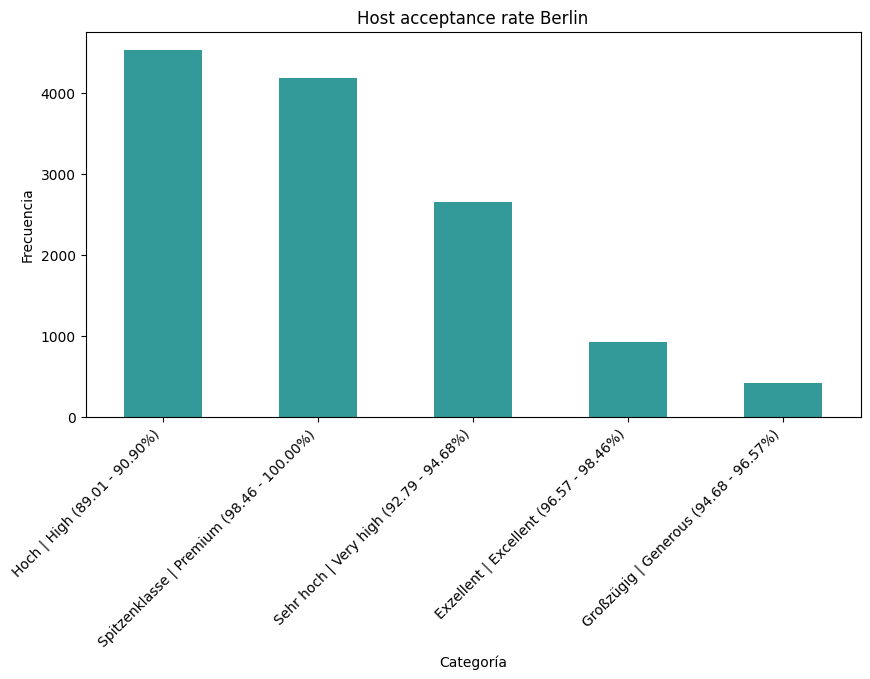

In [20]:
# Análisis univariado host_acceptance_rate
Tabla_freq_accept = df_extrac['host_acceptance_rate_cat'].value_counts().reset_index()
Tabla_freq_accept.columns = ['host_acceptance_rate_cat','count']

# Filtro de valores más relevantes
Filtro_accept = Tabla_freq_accept[Tabla_freq_accept['count'] > 1].head(5)

# Ajustar índice
Filtro_index_accept = Filtro_accept.set_index('host_acceptance_rate_cat')

# Gráfica de barras
Filtro_index_accept['count'].plot(kind='bar', figsize=(10,5), color="teal", alpha=0.8)
plt.title('Host acceptance rate Berlin')
plt.ylabel('Frecuencia')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.show()

Interpretación:

La tasa de aceptación de los host es parecida a la tasa de respuesta, en la cual se puede observar que el top 5 se encuentra igualmente por arriba del 89%, seguidos de Premium con 98.46-100%.

In [21]:
#host_total_listings_count
#Calculamos el número total de la población "n"
df_extrac['host_total_listings_count'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_list = df_extrac['host_total_listings_count'].max() #16
Min_list  = df_extrac['host_total_listings_count'].min() #0
Limites_list = [Min_list, Max_list]
print(Limites_list)

# Rango R
R_list = Max_list - Min_list
print("Rango: ",R_list) #16

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_list = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_list) #14.78

# Calculamos el ancho del intervalo "i"
i_list = R_list/ni_list
print("Ancho del intervalo: ",i_list) #1

intervalos_list = np.linspace(0, 16,16) # se le resta un decimal al del inicio y se le suma un decimal al final
print(intervalos_list)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_list = ["Einzellisting | Single host (0 - 1)",
    "Klein | Small (1 - 2)",
    "Kompakt | Compact (2 - 3)",
    "Lokal | Local (3 - 4)",
    "Beginnend | Emerging (4 - 5)",
    "Ausgebaut | Expanded (5 - 6)",
    "Etabliert | Established (6 - 7)",
    "Mehrfach | Multi-listing (7 - 8)",
    "Vernetzt | Networked (8 - 9)",
    "Regional | Regional (9 - 10)",
    "Groß | Large (10 - 11)",
    "Sehr groß | Very large (11 - 12)",
    "Betreiber | Operator (12 - 13)",
    "Professionell | Professional (13 - 14)",
    "Konzern | Corporate (14 - 16)"]

# Creando las categorias en la columna
df_extrac['host_total_listings_count_cat'] = pd.cut(x = df_extrac['host_total_listings_count'], bins = intervalos_list, labels = categorias_list)
df_extrac[['host_total_listings_count', 'host_total_listings_count_cat']].head(20)




<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(0.0), np.float64(16.0)]
Rango:  16.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  1.082230827888238
[ 0.          1.06666667  2.13333333  3.2         4.26666667  5.33333333
  6.4         7.46666667  8.53333333  9.6        10.66666667 11.73333333
 12.8        13.86666667 14.93333333 16.        ]


,host_total_listings_count,host_total_listings_count_cat
0,1.0,Einzellisting | Single host (0 - 1)
1,1.0,Einzellisting | Single host (0 - 1)
2,5.0,Beginnend | Emerging (4 - 5)
3,4.0,Lokal | Local (3 - 4)
4,5.0,Beginnend | Emerging (4 - 5)
5,4.0,Lokal | Local (3 - 4)
6,5.0,Beginnend | Emerging (4 - 5)
7,1.0,Einzellisting | Single host (0 - 1)
8,1.0,Einzellisting | Single host (0 - 1)
9,5.0,Beginnend | Emerging (4 - 5)


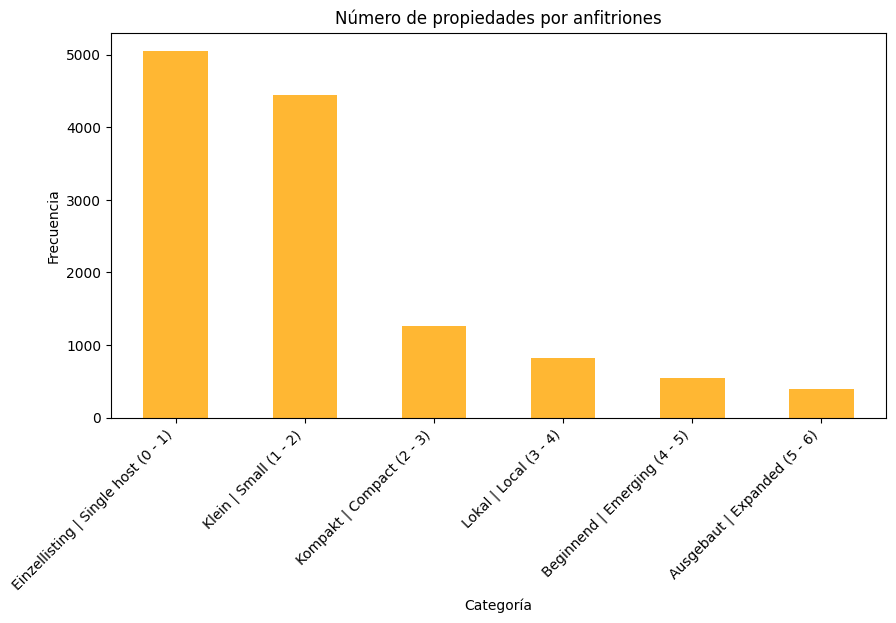

In [73]:
# Análisis univariado host_total_listings_count
Tabla_freq_list = df_extrac['host_total_listings_count_cat'].value_counts().reset_index()
Tabla_freq_list.columns = ['host_total_listings_count_cat','count']

Filtro_list = Tabla_freq_list[Tabla_freq_list['count'] > 1].head(6)
Filtro_index_list = Filtro_list.set_index('host_total_listings_count_cat')

# Gráfica
Filtro_index_list['count'].plot(kind='bar', figsize=(10,5), color="orange", alpha=0.8)
plt.title('Número de propiedades por anfitriones')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frecuencia')
plt.show()

Interpretación:

Podemos observar que dentro del top 5, la mayoría de host, solo ofrecen un alojamiento, seguidos de los pequeños, siendo los últimos dentro del top 5 con 4-5 a alojamientos, y es aquí donde se puede enfatizar o realizar un análisis mas profundo con estas 5 categorías y observar el comportamiento de otras variables.

In [23]:
#accomodates
#Calculamos el número total de la población "n"
df_extrac['accommodates'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_acco = df_extrac['accommodates'].max() #7
Min_acco  = df_extrac['accommodates'].min() #1
Limites_acco = [Min_acco, Max_acco]
print(Limites_acco)

# Rango R
R_acco = Max_acco - Min_acco
print("Rango: ",R_acco) #6

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_acco = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_acco) #14.78

# Calculamos el ancho del intervalo "i"
i_acco = R_acco/ni_acco
print("Ancho del intervalo: ",i_acco) #0.405

intervalos_acco = np.linspace(0.99, 7,8) # se le resta un decimal al del inicio y se le suma un decimal al final, ajustado para evitar datos decimales y trabajar con enteros
print(intervalos_acco)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_acco = ["1 Gast | 1 guest", "2 Gäste | 2 guests", "3 Gäste | 3 guests",
    "4 Gäste | 4 guests", "5 Gäste | 5 guests", "6 Gäste | 6 guests",
    "7 Gäste | 7 guests"]

# Creando las categorias en la columna
df_extrac['accommodates_cat'] = pd.cut(x = df_extrac['accommodates'], bins = intervalos_acco, labels = categorias_acco)
df_extrac[['accommodates', 'accommodates_cat']].head(20)



<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(1.0), np.float64(7.0)]
Rango:  6.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  0.40583656045808925
[0.99       1.84857143 2.70714286 3.56571429 4.42428571 5.28285714
 6.14142857 7.        ]


,accommodates,accommodates_cat
0,2.0,2 Gäste | 2 guests
1,7.0,7 Gäste | 7 guests
2,1.0,1 Gast | 1 guest
3,4.0,4 Gäste | 4 guests
4,2.0,2 Gäste | 2 guests
5,2.0,2 Gäste | 2 guests
6,2.0,2 Gäste | 2 guests
7,6.0,6 Gäste | 6 guests
8,4.0,4 Gäste | 4 guests
9,4.0,4 Gäste | 4 guests


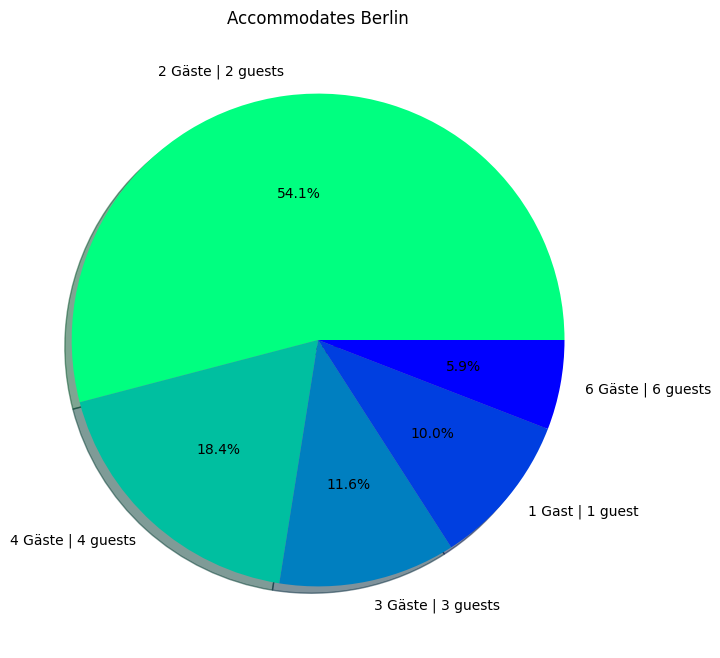

In [24]:
# Análisis univariado accommodates
Tabla_freq_acco = df_extrac['accommodates_cat'].value_counts().reset_index()
Tabla_freq_acco.columns = ['accommodates_cat','count']

Filtro_acco = Tabla_freq_acco[Tabla_freq_acco['count'] > 1].head(5)
Filtro_index_acco = Filtro_acco.set_index('accommodates_cat')

# Gráfica de pastel
Filtro_index_acco['count'].plot(kind='pie', figsize=(8,8), autopct='%0.1f%%', shadow=True, colormap='winter_r')
plt.title('Accommodates Berlin')
plt.ylabel('')
plt.show()

Interpretación:

Podemos observar que para Berlin, dentro del top 5 para la capacidad máxima por alojamientos, la que lidera con el 54.1% es de 2 invitados, seguidos de 4 invitados, por lo que sería ideal realizar una segmentación sobre las distintas capacidades para los alojamientos, y ver su fluctuabilidad en otras variables.

In [25]:
#beds
#Calculamos el número total de la población "n"
df_extrac['beds'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_beds = df_extrac['beds'].max() #3
Min_beds  = df_extrac['beds'].min() #0
Limites_beds = [Min_beds, Max_beds]
print(Limites_beds)

# Rango R
R_beds = Max_beds - Min_beds 
print("Rango: ",R_beds) #3

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni) #14.78

# Calculamos el ancho del intervalo "i"
i_beds = R_beds/ni
print("Ancho del intervalo: ",i_beds) #0.20

intervalos_beds = np.linspace(0, 3.01, 5) # se le resta un decimal al del inicio y se le suma un decimal al final, ajustado para evitar datos decimales y trabajar con enteros
print(intervalos_beds)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_beds = [ "Kein Bett | No bed (0)", 
    "Ein Bett | 1 bed", 
    "Zwei Betten | 2 beds", 
    "Drei Betten | 3 beds"]

# Creando las categorias en la columna
df_extrac['beds_cat'] = pd.cut(x = df_extrac['beds'], bins = intervalos_beds, labels = categorias_beds, include_lowest=True, 
    right=False)
df_extrac[['beds', 'beds_cat']].head(20)




<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(0.0), np.float64(3.0)]
Rango:  3.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  0.20291828022904462
[0.     0.7525 1.505  2.2575 3.01  ]


,beds,beds_cat
0,2.0,Zwei Betten | 2 beds
1,1.0,Ein Bett | 1 bed
2,1.0,Ein Bett | 1 bed
3,2.0,Zwei Betten | 2 beds
4,1.0,Ein Bett | 1 bed
5,1.0,Ein Bett | 1 bed
6,1.0,Ein Bett | 1 bed
7,1.0,Ein Bett | 1 bed
8,2.0,Zwei Betten | 2 beds
9,1.0,Ein Bett | 1 bed


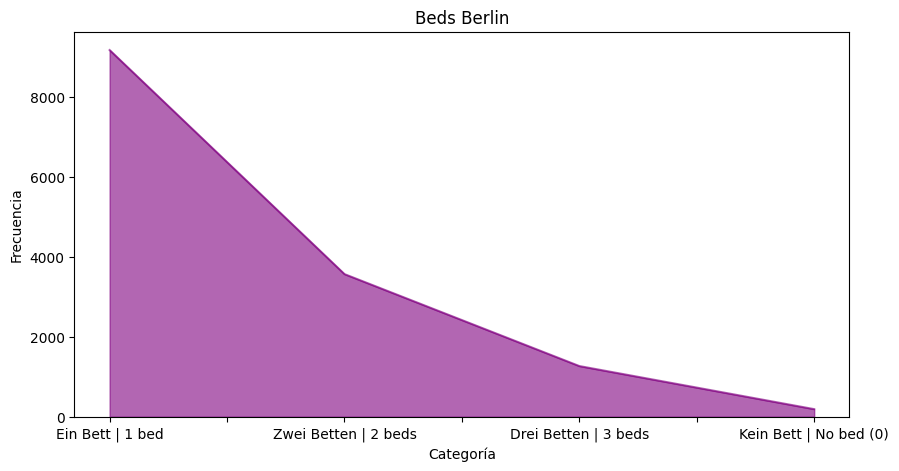

In [26]:
# Análisis univariado beds
Tabla_freq_beds = df_extrac['beds_cat'].value_counts().reset_index()
Tabla_freq_beds.columns = ['beds_cat','count']

Filtro_beds = Tabla_freq_beds[Tabla_freq_beds['count'] > 1].head(5)
Filtro_index_beds = Filtro_beds.set_index('beds_cat')

# Gráfica de área
Filtro_index_beds['count'].plot(kind='area', figsize=(10,5), alpha=0.6, color="purple")
plt.title('Beds Berlin')
plt.ylabel('Frecuencia')
plt.xlabel('Categoría')
plt.show()

Interpretación:

Podemos observar una disminución en el número de camas, así como el número de frecuencia a la vez también disminuye, por lo que sería correcto indagar por que sucede esto, si el top 2 de accomodates, es de 4 personas.

In [27]:
#price
#Calculamos el número total de la población "n"
df_extrac['price'].info()
n = 14187

# Obtener límites de la columna objetivo
Max_price = df_extrac['price'].max() #299
Min_price  = df_extrac['price'].min() #5
Limites_price = [Min_price, Max_price]
print(Limites_price)

# Rango R
R_price = Max_price - Min_price
print("Rango: ",R_price) #294

# Calculamos el número de intervalos de la calse "ni", aplicando regla de Sturges
ni_price = 1+3.32*np.log10(n)
print("Número de intervalos (Sturges): ",ni_price) #14.78

# Calculamos el ancho del intervalo "i"
i_price = R_price/ni_price
print("Ancho del intervalo: ",i_price) #19.89

intervalos_price = np.linspace(4.99, 299.01,16) # se le resta un decimal al del inicio y se le suma un decimal al final
print(intervalos_price)

# Creamos categorías, deben ser en base a la naturaleza de la columna
categorias_price = [ "Sehr günstig | Very cheap (5 - 25€)",
    "Günstig | Cheap (25 - 45€)",
    "Preiswert | Budget (45 - 65€)",
    "Erschwinglich | Affordable (65 - 85€)",
    "Standard (85 - 105€)",
    "Komfort (105 - 125€)",
    "Mittelklasse | Mid-range (125 - 145€)",
    "Oberklasse | Upper (145 - 165€)",
    "Premium | Premium (165 - 185€)",
    "Teuer | Expensive (185 - 205€)",
    "Sehr teuer | Very expensive (205 - 225€)",
    "Luxus | Luxury (225 - 245€)",
    "Exklusiv | Exclusive (245 - 265€)",
    "High-End | High-end (265 - 285€)",
    "Elite | Elite (285 - 300€)"]

# Creando las categorias en la columna
df_extrac['price_cat'] = pd.cut(x = df_extrac['price'], bins = intervalos_price, labels = categorias_price)
df_extrac[['price', 'price_cat']].head(20)




<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: price
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(5.0), np.float64(299.0)]
Rango:  294.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  19.885991462446373
[  4.99        24.59133333  44.19266667  63.794       83.39533333
 102.99666667 122.598      142.19933333 161.80066667 181.402
 201.00333333 220.60466667 240.206      259.80733333 279.40866667
 299.01      ]


,price,price_cat
0,105.000000,Komfort (105 - 125€)
1,135.000000,Mittelklasse | Mid-range (125 - 145€)
2,75.000000,Erschwinglich | Affordable (65 - 85€)
3,173.672536,Premium | Premium (165 - 185€)
4,28.000000,Günstig | Cheap (25 - 45€)
5,173.672536,Premium | Premium (165 - 185€)
6,53.000000,Preiswert | Budget (45 - 65€)
7,164.000000,Premium | Premium (165 - 185€)
8,173.672536,Premium | Premium (165 - 185€)
9,260.000000,High-End | High-end (265 - 285€)


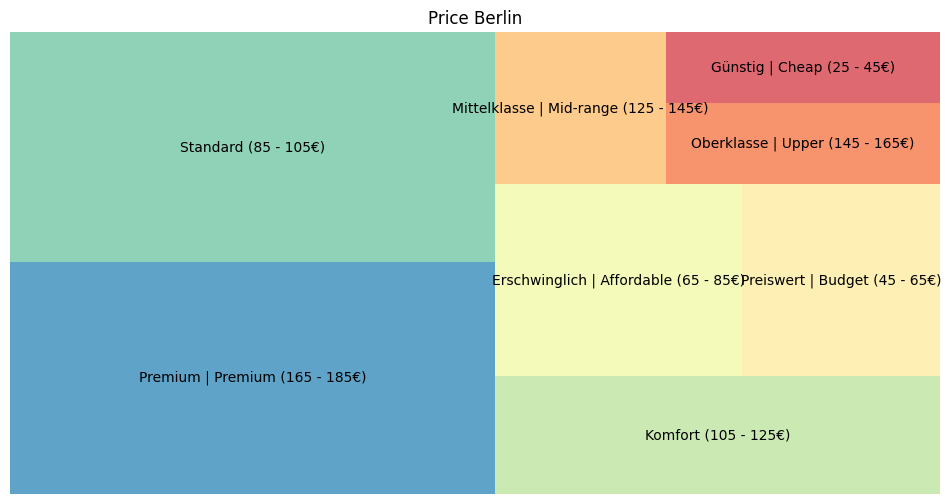

In [28]:
# Análisis univariado price
Tabla_freq_price = df_extrac['price_cat'].value_counts().reset_index()
Tabla_freq_price.columns = ['price_cat','count']

Filtro_price = Tabla_freq_price[Tabla_freq_price['count'] > 1].head(8)

# Treemap
plt.figure(figsize=(12,6))
squarify.plot(sizes=Filtro_price['count'], label=Filtro_price['price_cat'], alpha=0.8, color=sns.color_palette("Spectral_r", len(Filtro_price)))
plt.title('Price Berlin')
plt.axis('off')
plt.show()

Interpretación
La mayoría de los prices en Berlin, rondan entre standards y premium, de ahí salen 3 categorías mas, con 2 rangos de precio inferio a Standard y 1 mayor.

In [29]:
#maximum_nights_avg_ntm
#Calculamos el número total de la población "n"
df_extrac['maximum_nights_avg_ntm'].info()
n = 14187

# Obtener límites
Max_max_ntm = df_extrac['maximum_nights_avg_ntm'].max() #1414
Min_max_ntm = df_extrac['maximum_nights_avg_ntm'].min() #1
Limites_max_ntm = [Min_max_ntm, Max_max_ntm]
print(Limites_max_ntm) 

# Rango
R_max_ntm = Max_max_ntm - Min_max_ntm
print("Rango: ", R_max_ntm) #1413

# Número de intervalos (Sturges)
ni_max_ntm = 1 + 3.32 * np.log10(n)
print("Número de intervalos (Sturges): ", ni_max_ntm) #14.78

# Ancho del intervalo i
i_max_ntm = R_max_ntm / ni_max_ntm
print("Ancho del intervalo: ", i_max_ntm) #95.57

intervalos_max_ntm = np.linspace(Min_max_ntm - 0.01, Max_max_ntm + 0.01, 16)
print(intervalos_max_ntm)

# Categorías (rellenar según intervalos)
categorias_max_ntm = ["Sehr kurz | Very short (1 - 95)", 
    "Kurz | Short (96 - 189 )", 
    "Relativ kurz | Relatively short (190 - 283)", 
    "Mittellang | Mid-length (284 - 377)", 
    "Erweitert | Extended (378 - 471)", 
    "Lang | Long (472 - 565)", 
    "Sehr lang | Very long (566 - 659)", 
    "Saison | Seasonal (660 - 753)", 
    "Ausgedehnt | Prolonged (754 - 847)", 
    "Jahresnah | Year-like (848 - 941)", 
    "Mehr als ein Jahr | Beyond a year (942 - 1035)", 
    "Langfristig | Long-term (1036 - 1129)", 
    "Sehr langfristig | Very long-term (1130 - 1223)", 
    "Extrem | Extreme (1224 - 1317)", 
    "Außergewöhnlich | Exceptional (1318 - 1414)"]

# Nueva columna
df_extrac['maximum_nights_avg_ntm_cat'] = pd.cut(
    x=df_extrac['maximum_nights_avg_ntm'],
    bins=intervalos_max_ntm,
    labels=categorias_max_ntm,
    include_lowest=True,
    right=False
)

df_extrac[['maximum_nights_avg_ntm', 'maximum_nights_avg_ntm_cat']].head(20)


<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(1.0), np.float64(1414.0)]
Rango:  1413.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  95.57450998788002
[9.90000000e-01 9.51913333e+01 1.89392667e+02 2.83594000e+02
 3.77795333e+02 4.71996667e+02 5.66198000e+02 6.60399333e+02
 7.54600667e+02 8.48802000e+02 9.43003333e+02 1.03720467e+03
 1.13140600e+03 1.22560733e+03 1.31980867e+03 1.41401000e+03]


,maximum_nights_avg_ntm,maximum_nights_avg_ntm_cat
0,730.0,Saison | Seasonal (660 - 753)
1,14.0,Sehr kurz | Very short (1 - 95)
2,1125.0,Langfristig | Long-term (1036 - 1129)
3,365.0,Mittellang | Mid-length (284 - 377)
4,365.0,Mittellang | Mid-length (284 - 377)
5,730.0,Saison | Seasonal (660 - 753)
6,365.0,Mittellang | Mid-length (284 - 377)
7,30.0,Sehr kurz | Very short (1 - 95)
8,360.0,Mittellang | Mid-length (284 - 377)
9,364.0,Mittellang | Mid-length (284 - 377)


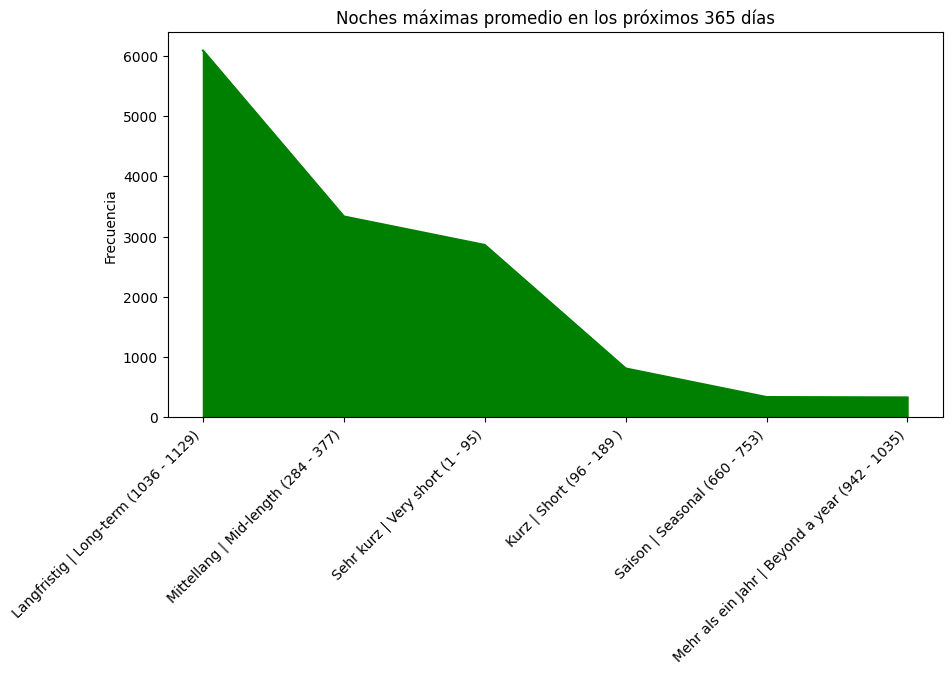

In [78]:
# Análisis univariado maximum_nights_avg_ntm
Tabla_freq_ntm = df_extrac['maximum_nights_avg_ntm_cat'].value_counts().reset_index()
Tabla_freq_ntm.columns = ['maximum_nights_avg_ntm_cat','count']

Filtro_ntm = Tabla_freq_ntm[Tabla_freq_ntm['count'] > 1].head(6)
Filtro_index_ntm = Filtro_ntm.set_index('maximum_nights_avg_ntm_cat')

# Gráfica de barras
Filtro_index_ntm['count'].plot(kind='area', figsize=(10,5), color="green")
plt.title('Noches máximas promedio en los próximos 365 días')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

Interpretación

Se puede observar que la duración máxima media permitida de la estancia para los alojamientos se centra en Long-term (1036-1129 días) y Mid-length (284-377), seguido de un repentino Very short (1-95 días), lo cual se puede deducir que los airbnbs tienen una duración máxima bastante larga, y de aquí también se puede partir a más insights.


In [31]:
# availability_365
df_extrac['availability_365'].info()
n = 14187

Max_avail = df_extrac['availability_365'].max() #365
Min_avail = df_extrac['availability_365'].min() #0
Limites_avail = [Min_avail, Max_avail]
print(Limites_avail)

R_avail = Max_avail - Min_avail
print("Rango: ", R_avail) #365

ni_avail = 1 + 3.32 * np.log10(n)
print("Número de intervalos (Sturges): ", ni_avail) #14.78

i_avail = R_avail / ni_avail
print("Ancho del intervalo: ", i_avail) #24.69

intervalos_avail = np.linspace(Min_avail - 0.01, Max_avail + 0.01, 16)
print(intervalos_avail)

categorias_avail = ["Sehr gering | Very low (0 - 24)", 
    "Gering | Low (25 - 49)", 
    "Eingeschränkt | Limited (50 - 74)", 
    "Kurzfristig | Short-term (75 - 99)", 
    "Moderat niedrig | Moderately low (100 - 124)", 
    "Mittel | Medium (125 - 149)", 
    "Stabil | Stable (150 - 174)", 
    "Solide | Solid (175 - 199)", 
    "Akzeptabel | Acceptable (200 - 224)", 
    "Regelmäßig | Regular (225 - 249)", 
    "Hoch | High (250 - 274)", 
    "Sehr hoch | Very high (275 - 299)", 
    "Fast ganzjährig | Almost year-round (300 - 324)", 
    "Ganzjährig | Year-round (325 - 349)", 
    "Immer verfügbar | Always available (350 - 365)"]

df_extrac['availability_365_cat'] = pd.cut(
    x=df_extrac['availability_365'],
    bins=intervalos_avail,
    labels=categorias_avail,
    include_lowest=True,
    right=False
)

df_extrac[['availability_365', 'availability_365_cat']].head(20)

<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
14187 non-null  int64
dtypes: int64(1)
memory usage: 221.7 KB
[np.int64(0), np.int64(365)]
Rango:  365
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  24.68839076120043
[-1.00000000e-02  2.43246667e+01  4.86593333e+01  7.29940000e+01
  9.73286667e+01  1.21663333e+02  1.45998000e+02  1.70332667e+02
  1.94667333e+02  2.19002000e+02  2.43336667e+02  2.67671333e+02
  2.92006000e+02  3.16340667e+02  3.40675333e+02  3.65010000e+02]


,availability_365,availability_365_cat
0,250,Hoch | High (250 - 274)
1,193,Solide | Solid (175 - 199)
2,262,Hoch | High (250 - 274)
3,0,Sehr gering | Very low (0 - 24)
4,111,Moderat niedrig | Moderately low (100 - 124)
5,0,Sehr gering | Very low (0 - 24)
6,52,Eingeschränkt | Limited (50 - 74)
7,177,Solide | Solid (175 - 199)
8,9,Sehr gering | Very low (0 - 24)
9,347,Immer verfügbar | Always available (350 - 365)


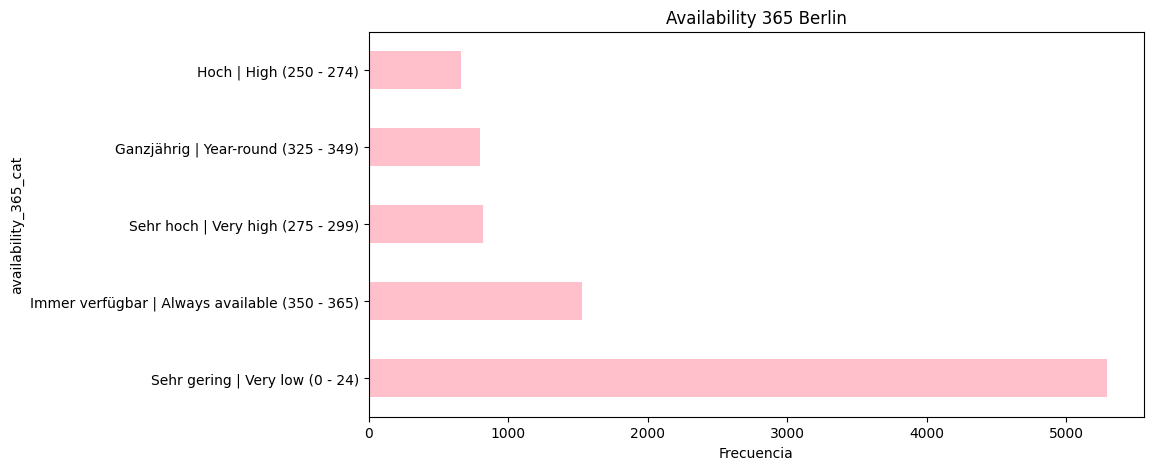

In [32]:
# Análisis univariado availability_365
Tabla_freq_avail = df_extrac['availability_365_cat'].value_counts().reset_index()
Tabla_freq_avail.columns = ['availability_365_cat','count']

Filtro_avail = Tabla_freq_avail[Tabla_freq_avail['count'] > 1].head(5)
Filtro_index_avail = Filtro_avail.set_index('availability_365_cat')

# Horizontal bar
Filtro_index_avail['count'].plot(kind='barh', figsize=(10,5), color="pink")
plt.title('Availability 365 Berlin')
plt.xlabel('Frecuencia')
plt.show()

Interpretación

Se observa que la disponibilidad a 365 días en el futuro para el alojamiento, y se observa que la mayoría de los alojamientos, entran en un rango de 0-24 días, lo que indica que la mayoría de hosts en Berlín solo habilitan sus alojamientos por periodos muy limitados del año, pero existe también un grupo importante de alojamientos siempre disponibles (365), lo que refleja la coexistencia de anfitriones ocasionales y operadores profesionales.

In [33]:
# number_of_reviews
df_extrac['number_of_reviews'].info()
n = 14187

Max_reviews = df_extrac['number_of_reviews'].max() #93
Min_reviews = df_extrac['number_of_reviews'].min() #0
Limites_reviews = [Min_reviews, Max_reviews]
print(Limites_reviews)

R_reviews = Max_reviews - Min_reviews
print("Rango: ", R_reviews) #93

ni_reviews = 1 + 3.32 * np.log10(n)
print("Número de intervalos (Sturges): ", ni_reviews) #14.78

i_reviews = R_reviews / ni_reviews
print("Ancho del intervalo: ", i_reviews) #6.29

intervalos_reviews = np.linspace(Min_reviews - 0.01, Max_reviews + 0.01, 16)
print(intervalos_reviews)

categorias_reviews = ["Keine Bewertung | No reviews (0 - 6)", 
    "Sehr wenige | Very few (7 - 12)", 
    "Wenige | Few (13 - 18)", 
    "Einige | Some (19 - 24)", 
    "Begrenzt | Limited (25 - 30)", 
    "Moderat | Moderate (31 - 36)", 
    "Stabil | Steady (37 - 42)", 
    "Zunehmend | Growing (43 - 48)", 
    "Regelmäßig | Regular (49 - 54)", 
    "Oft | Often (55 - 60)", 
    "Hoch | High (61 - 66)", 
    "Sehr hoch | Very high (67 - 72)", 
    "Extensiv | Extensive (73 - 78)", 
    "Intensiv | Intensive (79 - 84)", 
    "Außergewöhnlich | Exceptional (85 - 93)"]

df_extrac['number_of_reviews_cat'] = pd.cut(
    x=df_extrac['number_of_reviews'],
    bins=intervalos_reviews,
    labels=categorias_reviews,
    include_lowest=True,
    right=False
)

df_extrac[['number_of_reviews', 'number_of_reviews_cat']].head(20)

<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(0.0), np.float64(93.0)]
Rango:  93.0
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  6.290466687100383
[-1.00000000e-02  6.19133333e+00  1.23926667e+01  1.85940000e+01
  2.47953333e+01  3.09966667e+01  3.71980000e+01  4.33993333e+01
  4.96006667e+01  5.58020000e+01  6.20033333e+01  6.82046667e+01
  7.44060000e+01  8.06073333e+01  8.68086667e+01  9.30100000e+01]


,number_of_reviews,number_of_reviews_cat
0,5.0,Keine Bewertung | No reviews (0 - 6)
1,7.0,Sehr wenige | Very few (7 - 12)
2,26.0,Begrenzt | Limited (25 - 30)
3,48.0,Zunehmend | Growing (43 - 48)
4,5.0,Keine Bewertung | No reviews (0 - 6)
5,60.0,Oft | Often (55 - 60)
6,5.0,Keine Bewertung | No reviews (0 - 6)
7,5.0,Keine Bewertung | No reviews (0 - 6)
8,5.0,Keine Bewertung | No reviews (0 - 6)
9,5.0,Keine Bewertung | No reviews (0 - 6)


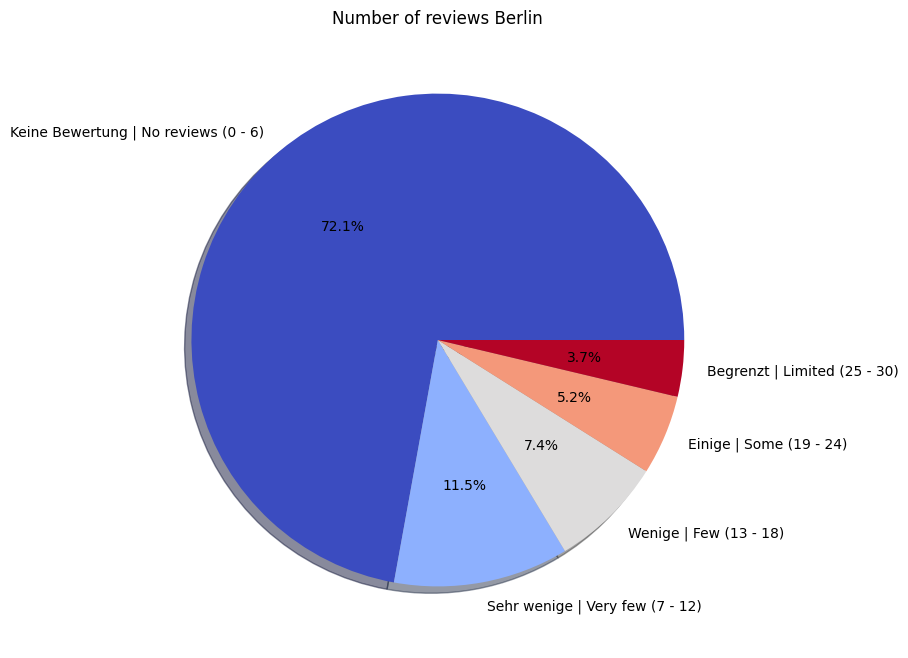

In [34]:
# Análisis univariado number_of_reviews
Tabla_freq_reviews = df_extrac['number_of_reviews_cat'].value_counts().reset_index()
Tabla_freq_reviews.columns = ['number_of_reviews_cat','count']

Filtro_reviews = Tabla_freq_reviews[Tabla_freq_reviews['count'] > 1].head(5)
Filtro_index_reviews = Filtro_reviews.set_index('number_of_reviews_cat')

# Pie chart
Filtro_index_reviews['count'].plot(kind='pie', figsize=(8,8), autopct='%0.1f%%', shadow=True, colormap='coolwarm')
plt.title('Number of reviews Berlin')
plt.ylabel('')
plt.show()

Interpretación

Se puede observar que el número de reviews para los alojamientos entran en un rango de 0 a 6 reviews considerado como No reviews, seguidos de Very few (7-12), por lo que hay un claro detalle en el número que dejan los huéspedes, por lo que se podrían tomar medidas para incitar a que se deje un mayor número de reviews.


In [35]:
# review_scores_value
df_extrac['review_scores_value'].info()
n = 14187

Max_val = df_extrac['review_scores_value'].max() #5
Min_val = df_extrac['review_scores_value'].min() #1.5
Limites_val = [Min_val, Max_val]
print(Limites_val)

R_val = Max_val - Min_val
print("Rango: ", R_val) #3.5

ni_val = 1 + 3.32 * np.log10(n)
print("Número de intervalos (Sturges): ", ni_val) #14.78

i_val = R_val / ni_val
print("Ancho del intervalo: ", i_val) # 0.23

intervalos_val = np.linspace(Min_val - 0.01, Max_val + 0.01, 16)
print(intervalos_val)

categorias_val = ["Sehr schlecht | Very poor (1.50-1.73)",
    "Schlecht | Poor (1.73 - 1.96)",
    "Unzureichend | Insufficient (1.96 - 2.19)",
    "Mäßig | Fair (2.19 - 2.42)",
    "Unterdurchschnittlich | Below average (2.42 - 2.65)",
    "Durchschnittlich | Average (2.65 - 2.88)",
    "Ordentlich | Decent (2.88 - 3.11)",
    "Akzeptabel | Acceptable (3.11 - 3.34)",
    "Gut | Good (3.34 - 3.57)",
    "Sehr gut | Very good (3.57 - 3.80)",
    "Ausgezeichnet | Excellent (3.80 - 4.03)",
    "Hervorragend | Outstanding (4.03 - 4.26)",
    "Exzellent | Superb (4.26 - 4.49)",
    "Spitze | Top-rated (4.49 - 4.72)",
    "Perfekt | Perfect (4.72 - 5.00)"]

df_extrac['review_scores_value_cat'] = pd.cut(
    x=df_extrac['review_scores_value'],
    bins=intervalos_val,
    labels=categorias_val,
    include_lowest=True,
    right=False
)

df_extrac[['review_scores_value', 'review_scores_value_cat']].head(20)

<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(1.5), np.float64(5.0)]
Rango:  3.5
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  0.23673799360055206
[1.49       1.72466667 1.95933333 2.194      2.42866667 2.66333333
 2.898      3.13266667 3.36733333 3.602      3.83666667 4.07133333
 4.306      4.54066667 4.77533333 5.01      ]


,review_scores_value,review_scores_value_cat
0,4.61,Spitze | Top-rated (4.49 - 4.72)
1,4.86,Perfekt | Perfect (4.72 - 5.00)
2,4.45,Exzellent | Superb (4.26 - 4.49)
3,4.71,Spitze | Top-rated (4.49 - 4.72)
4,4.65,Spitze | Top-rated (4.49 - 4.72)
5,4.58,Spitze | Top-rated (4.49 - 4.72)
6,4.68,Spitze | Top-rated (4.49 - 4.72)
7,4.69,Spitze | Top-rated (4.49 - 4.72)
8,4.39,Exzellent | Superb (4.26 - 4.49)
9,4.45,Exzellent | Superb (4.26 - 4.49)


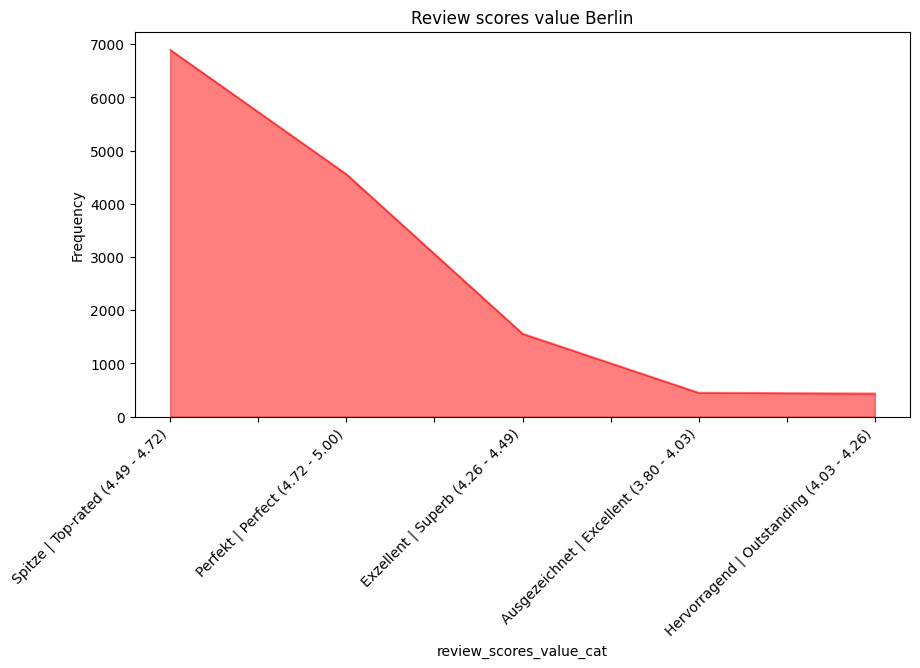

In [36]:
# Análisis univariado review_scores_value
Tabla_freq_value = df_extrac['review_scores_value_cat'].value_counts().reset_index()
Tabla_freq_value.columns = ['review_scores_value_cat','count']

Filtro_value = Tabla_freq_value[Tabla_freq_value['count'] > 1].head(5)
Filtro_index_value = Filtro_value.set_index('review_scores_value_cat')

# Area chart
Filtro_index_value['count'].plot(kind='area', figsize=(10,5), alpha=0.5, color="red")
plt.title('Review scores value Berlin')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

Interpretación:

Se puede observar que los review_scores_value, en donde los huéspedes tienden a otorgar calificaciones altas en la dimensión “value”. Esto puede significar que los precios son percibidos como justos o que los alojamientos cumplen con lo prometido. La caída en categorías más bajas sugiere que son excepciones y no la norma.

In [37]:
# reviews_per_month
df_extrac['reviews_per_month'].info()
n = 14187

Max_rpm = df_extrac['reviews_per_month'].max() #3.08
Min_rpm = df_extrac['reviews_per_month'].min() #0
Limites_rpm = [Min_rpm, Max_rpm]
print(Limites_rpm)

R_rpm = Max_rpm - Min_rpm
print("Rango: ", R_rpm) #3.08

ni_rpm = 1 + 3.32 * np.log10(n)
print("Número de intervalos (Sturges): ", ni_rpm) #14.78

i_rpm = R_rpm / ni_rpm
print("Ancho del intervalo: ", i_rpm) #0.21

intervalos_rpm = np.linspace(Min_rpm - 0.01, Max_rpm + 0.01, 16)
print(intervalos_rpm)

categorias_rpm = ["Keine Aktivität | No activity (0.00 - 0.21)",
    "Sehr gering | Very low (0.21 - 0.42)",
    "Gering | Low (0.42 - 0.63)",
    "Leicht | Slight (0.63 - 0.84)",
    "Mäßig niedrig | Moderately low (0.84 - 1.05)",
    "Mittel | Medium (1.05 - 1.26)",
    "Stabil | Steady (1.26 - 1.47)",
    "Akzeptabel | Acceptable (1.47 - 1.68)",
    "Regelmäßig | Regular (1.68 - 1.89)",
    "Hoch | High (1.89 - 2.10)",
    "Sehr hoch | Very high (2.10 - 2.31)",
    "Intensiv | Intensive (2.31 - 2.52)",
    "Extensiv | Extensive (2.52 - 2.73)",
    "Exzellent | Excellent (2.73 - 2.94)",
    "Außergewöhnlich | Exceptional (2.94 - 3.08)"]

df_extrac['reviews_per_month_cat'] = pd.cut(
    x=df_extrac['reviews_per_month'],
    bins=intervalos_rpm,
    labels=categorias_rpm,
    include_lowest=True,
    right=False
)

df_extrac[['reviews_per_month', 'reviews_per_month_cat']].head(20)


<class 'pandas.core.series.Series'>
Index: 14187 entries, 0 to 14186
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
14187 non-null  float64
dtypes: float64(1)
memory usage: 221.7 KB
[np.float64(0.0), np.float64(3.08)]
Rango:  3.08
Número de intervalos (Sturges):  14.784276688200496
Ancho del intervalo:  0.2083294343684858
[-0.01        0.19666667  0.40333333  0.61        0.81666667  1.02333333
  1.23        1.43666667  1.64333333  1.85        2.05666667  2.26333333
  2.47        2.67666667  2.88333333  3.09      ]


,reviews_per_month,reviews_per_month_cat
0,0.76,Leicht | Slight (0.63 - 0.84)
1,0.06,Keine Aktivität | No activity (0.00 - 0.21)
2,0.14,Keine Aktivität | No activity (0.00 - 0.21)
3,0.26,Sehr gering | Very low (0.21 - 0.42)
4,1.60,Akzeptabel | Acceptable (1.47 - 1.68)
5,0.33,Sehr gering | Very low (0.21 - 0.42)
6,1.05,Mittel | Medium (1.05 - 1.26)
7,0.16,Keine Aktivität | No activity (0.00 - 0.21)
8,0.54,Gering | Low (0.42 - 0.63)
9,1.11,Mittel | Medium (1.05 - 1.26)


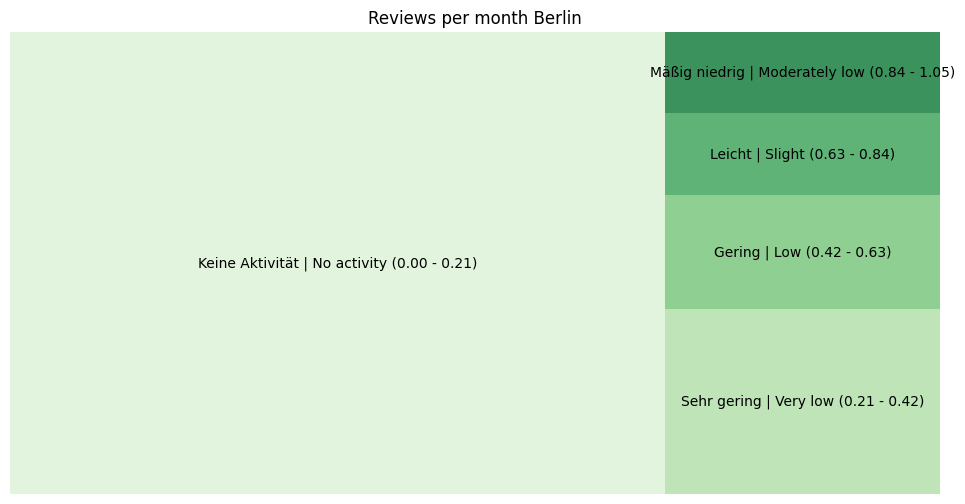

In [38]:
# Análisis univariado reviews_per_month
Tabla_freq_rpm = df_extrac['reviews_per_month_cat'].value_counts().reset_index()
Tabla_freq_rpm.columns = ['reviews_per_month_cat','count']

Filtro_rpm = Tabla_freq_rpm[Tabla_freq_rpm['count'] > 1].head(5)

plt.figure(figsize=(12,6))
squarify.plot(sizes=Filtro_rpm['count'], label=Filtro_rpm['reviews_per_month_cat'], alpha=0.8, color=sns.color_palette("Greens", len(Filtro_rpm)))
plt.title('Reviews per month Berlin')
plt.axis('off')
plt.show()

Interpretación

Se puede observar que aunque los alojamientos tienden a tener buenas calificaciones de valor, la actividad de reseñas es baja en general, que puede deberse a que:
- Alta proporción de listados con disponibilidad limitada.
- Competencia fuerte que reparte la demanda.
- Alojamientos que se anuncian pero no tienen huéspedes recurrentes.